# TD training stuff

In [2]:
import glob
import json
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

### Load files

In [ ]:
dir_wc = './multirun/2020-12-26/19-54-29/*'

# Read
data_paths_list = glob.glob(f'{dir_wc}/data.json')

# Parse into dict
Paths_dict = {}
for e in data_paths_list:
    Paths_dict[e.split('/')[-2]] = e

Paths_dict

In [ ]:
Data_dict = {}

for k in Paths_dict:
    with open(Paths_dict[k]) as infile:
        Data_dict[k] = json.load(infile)

print(len(Data_dict))

## Exploratory Visualization

In [66]:
Data_dict['0'].keys()

dict_keys(['config_dict', 'env_kwargs', 'training_data'])

### Visualize Errors

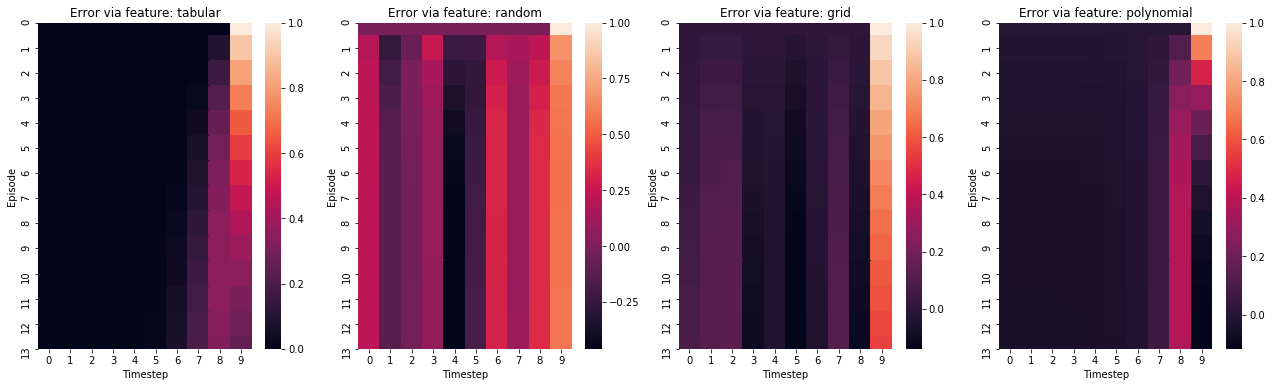

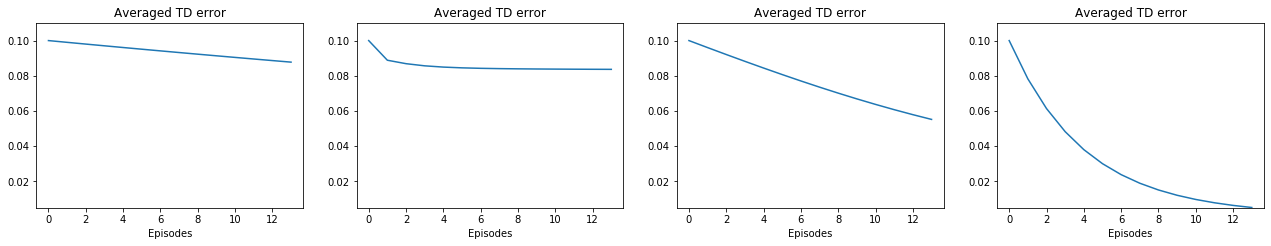

In [62]:
def script_visualize_errors(ddict):
    
    plt.figure(figsize=(22,6))
    for i, k in enumerate(ddict):
        # Get feature type and error
        cur_feature_type = ddict[k]['config_dict']['environment']['feature']['type']
        cur_error_nlist = ddict[k]['training_data']['td_errors']
        cur_err_mat = np.array(cur_error_nlist)
        
        # ==
        # subplot error map
        plt.subplot(1,len(ddict), (i+1))
        sns.heatmap(data=cur_err_mat)
        
        plt.title(f'Error via feature: {cur_feature_type}')
        plt.ylabel('Episode')
        plt.xlabel('Timestep')
    
    plt.show()
        
    # ==
    # subplot 
    
    plt.figure(figsize=(22,3.4))
    for i, k in enumerate(ddict):
        # Get feature type and error
        cur_feature_type = ddict[k]['config_dict']['environment']['feature']['type']
        cur_error_nlist = ddict[k]['training_data']['td_errors']
        cur_err_mat = np.array(cur_error_nlist)
        
        # ==
        # subplot error map
        plt.subplot(1,len(ddict), (i+1))
        plt.plot(np.average(cur_err_mat, axis=1))
        
        plt.ylim([5e-3,0.11])
        plt.title(f'Averaged TD error')
        plt.xlabel('Episodes')
    
    
    plt.show()
        
script_visualize_errors(Data_dict)

### Visualize features

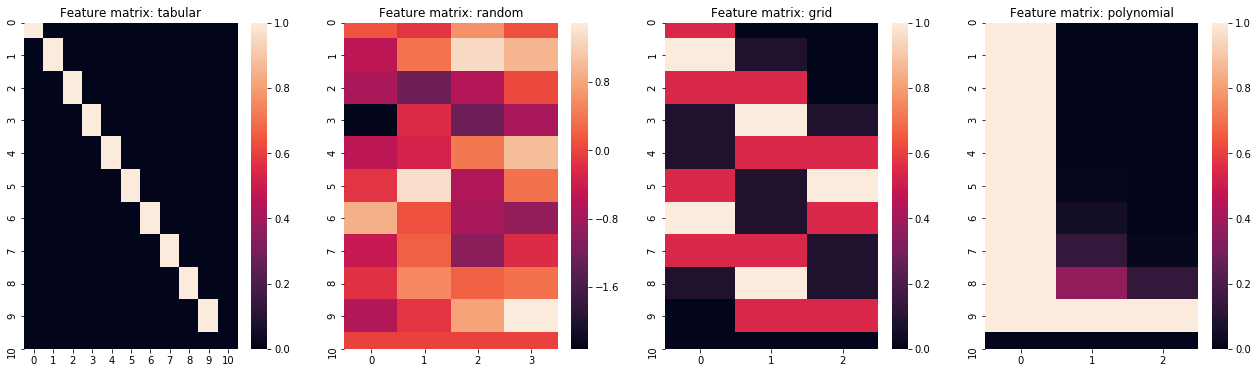

In [65]:
def script_visualize_features(ddict):
    
    plt.figure(figsize=(22,6))
    
    # Iterate over each run
    for i, k in enumerate(ddict):
        # Get feature type and error
        cur_feature_type = ddict[k]['config_dict']['environment']['feature']['type']
        cur_feat_nlist = ddict[k]['env_kwargs']['feature_mat']
        cur_feat_mat = np.array(cur_feat_nlist)
        
        # ==
        # subplot
        plt.subplot(1,len(ddict), (i+1))
        sns.heatmap(data=cur_feat_mat)
        
        plt.title(f'Feature matrix: {cur_feature_type}')

        
script_visualize_features(Data_dict)

In [67]:
Data_dict['0'].keys()

dict_keys(['config_dict', 'env_kwargs', 'training_data'])

In [69]:
Data_dict['0']['env_kwargs']['transition_mat']

[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]]